In [1]:
import requests as req

In [5]:
req.post("http://localhost:5000/ai/generate-masks").json()

{'message': 'Mask generation for all images is already in progress ()',
 'status': 'processing'}

In [10]:
import base64
import io
from typing import List, TypedDict
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


class MaskResponse(TypedDict):
    src: str


out: List[MaskResponse] = req.get("http://localhost:5000/ai/generate-mask/1").json()

In [8]:
# List as str to list
def str_to_list(s: str) -> List[List[int]]:
    return [
        [int(x) for x in item.strip("[]").split(",")]
        for item in s.strip("[]").split("], [")
    ]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


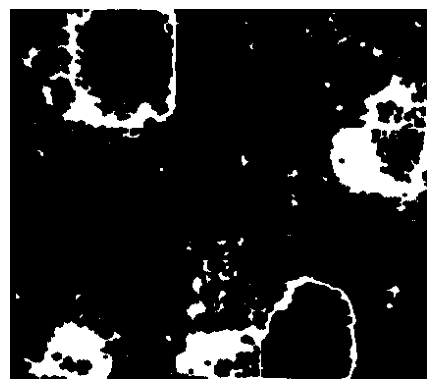

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


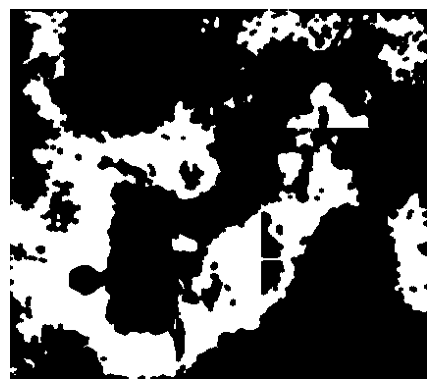

In [11]:
for item in out:
    image = np.array(str_to_list(item["src"]), dtype=np.uint8) * 255
    print(image[0][:30])  # Print unique values in the image

    # Display the image using matplotlib
    plt.imshow(image * 255, cmap="gray")
    plt.axis("off")  # Hide axes
    plt.show()

In [12]:
import cv2

np.load("../data/dataset/masks/0001/cryptes.npy").shape, cv2.imread(
    "../data/dataset/images/0001.jpg"
).shape

((349, 615), (349, 615, 3))